In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import imgaug.augmenters as ia
import math
from scipy.interpolate import lagrange, CubicSpline,splprep,splev,InterpolatedUnivariateSpline,KroghInterpolator
from numpy.polynomial.polynomial import Polynomial
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import glob
import pandas as pd
import os
import pickle
# from centerline.geometry import Centerline
from shapely.geometry import Polygon

ModuleNotFoundError: No module named 'imgaug'

In [20]:
img= cv2.imread("6.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=4)
img_clahe = clahe.apply(img)
plt.figure(figsize = (20,10))
plt.imshow(img_clahe,"gray")

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


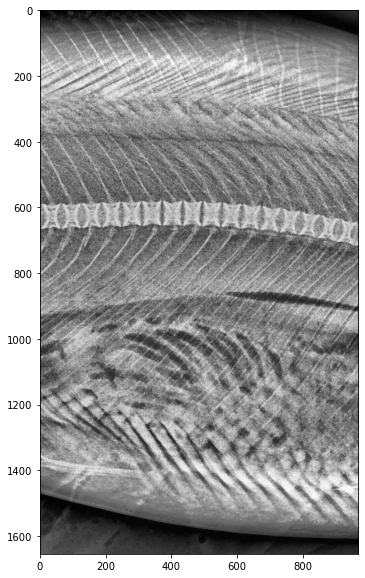

In [9]:
img= cv2.imread("9_3.jpg")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=5)
img_clahe = clahe.apply(img_gray)
plt.figure(figsize = (20,10))
plt.imshow(img_clahe,"gray")

In [4]:
img = cv2.imread("raw/1393.jpg")
with open("raw/1393.json","r") as f:
    data = json.load(f)
points = data["shapes"][0]["points"]
points = np.array(points,dtype = np.int32)
# polygon = Polygon(points)
# attributes = {"id":1}
# centerline = Centerline(polygon,**attributes)
# center= []
# cv2.polylines(img,[points],True,(0,255,0),2)
# for points in centerline._construct_centerline():
#     point1,point2 = list(points.coords)
#     point1_int = round(point1[0]),round(point1[1])
#     point2_int = round(point2[0]),round(point2[1])
#     center.append((point1_int,point2_int))
# for i in range(0,len(center)):
#     img = cv2.line(img, center[i][0],center[i][1],(255,255,0),2)
# plt.figure(figsize=(15,15))
# plt.imshow(img)

0.94607105916887


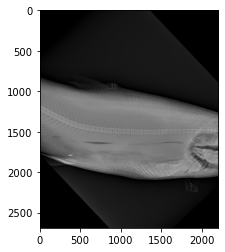

In [8]:
img = cv2.imread("raw/1393.jpg")
with open("raw/1393.json","r") as f:
    data = json.load(f)
points = data["shapes"][0]["points"]
points = np.array(points,dtype = np.int32)
xs  = points[:,0]
ys =  points[:,1]
xs = np.array(xs).reshape(-1,1)
ys = np.array(ys).reshape(-1,1)
reg = LinearRegression().fit(xs,ys)
hesogoc = reg.coef_[0][0]
print(hesogoc)
if hesogoc > 0:
    angle = np.arctan(hesogoc)*180/3.14
else:
    angle = 180 - np.arctan(-1*hesogoc)*180/3.14
aug = ia.Rotate(-1 * angle)
img_aug = aug.augment_image(img)
plt.imshow(img_aug)

In [2]:
def centroid(vertexes):
     _x_list = [vertex [0] for vertex in vertexes]
     _y_list = [vertex [1] for vertex in vertexes]
     _len = len(vertexes)
     _x = int(sum(_x_list) / _len)
     _y = int(sum(_y_list) / _len)
     return(_x, _y)

In [17]:
def create_histogram(arr,name_fig):
    keys = set(arr)
    dict_hist = dict.fromkeys(keys,0)
    for item in arr:
        dict_hist[item] += 1
    plt.figure(1)
    plt.bar(list(dict_hist.keys()),list(dict_hist.values()))
    plt.close()

In [3]:
path_to_excel = r"data/20181106_OC171D/X-ray scoring NZKS OT high fish oil trial Score Data OC171D.xlsx"
dfb = pd.read_excel(path_to_excel, skiprows=(1,2,3),engine='openpyxl')

columns = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2','LKS Region 1 X-ray', 'LKS Region 2 X-ray', 'LKS Region 3 X-ray', 'LKS Region 4 X-ray',
            'Fusion Region 1 X-ray', 'Fusion Region 2 X-ray', 'Fusion Region 3 X-ray', 'Fusion Region 4 X-ray',
            'Compression and/or reduced intervertebral space Region 1 X-ray',
            'Compression and/or reduced intervertebral space Region 2 X-ray',
            'Compression and/or reduced intervertebral space Region 3 X-ray',
            'Compression and/or reduced intervertebral space Region 4 X-ray',
            'Vertical shift Region 1 X-ray', 
            'Vertical shift Region 2 X-ray', 
            'Vertical shift Region 3 X-ray', 
            'Vertical shift Region 4 X-ray'
            ]
data = dfb[columns]
# gt ={}
list_samples =[]
for i in range(0,300):
    file_name = data["Unnamed: 0"][i].split("/")[1]+".jpg"
#   label =[]
    for key in columns[11:15]:
        if data[key][i] == 3:
            list_samples.append(file_name)
print(list_samples)
#   gt[file_name] = label


['19.jpg', '57.jpg', '64.jpg', '65.jpg', '127.jpg', '147.jpg', '147.jpg', '158.jpg', '167.jpg', '260.jpg', '296.jpg']


In [6]:

# with open("kq_pred_B.pkl","rb") as f:
#     kq = pickle.load(f)
# with open("kq_pred_C.pkl","rb") as f:
#     kq1 = pickle.load(f)
with open("kq_pred_D.pkl","rb") as f:
    kq2 = pickle.load(f)
# kq.extend(kq1)
# kq.extend(kq2)
sev0 = []
sev1 = []
sev2 = []
sev3 = []

for sample in kq2:
    GT = sample["GT"]
    pred = sample["Pred"]
    for index,region in enumerate(GT):
        if region == 1:
            sev1.append(int(pred[index]))
        elif region == 2:
            sev2.append(int(pred[index]))
        elif region == 3:
            sev3.append(int(pred[index]))
        else:
            sev0.append(int(pred[index]))

count0= 0
count1 = 0
count2 = 0
count3 = 0

for item in sev1:
    if item >= 6 and item <18:
        count1 +=1 
for item in sev0:
    if item < 6:
        count0 += 1
for item in sev2:
    if item >= 18 and  item <40:
        count2 += 1    
for item in sev3:
    if item >= 40:
        count3 +=1
print("Severity 0 --- GT: {} ---True: {} --Accuracy: {}".format(len(sev0),count0,count0/len(sev0)))
print("Severity 1 --- GT: {} ---True: {} --Accuracy: {}".format(len(sev1),count1,count1/len(sev1)))
print("Severity 2 --- GT: {} ---True: {} --Accuracy: {}".format(len(sev2),count2,count2/len(sev2)))
print("Severity 3 --- GT: {} ---True: {} --Accuracy: {}".format(len(sev3),count3,count3/len(sev3)))

Severity 0 --- GT: 768 ---True: 727 --Accuracy: 0.9466145833333334
Severity 1 --- GT: 302 ---True: 170 --Accuracy: 0.5629139072847682
Severity 2 --- GT: 34 ---True: 25 --Accuracy: 0.7352941176470589
Severity 3 --- GT: 4 ---True: 3 --Accuracy: 0.75


In [12]:
path_to_folder = "json"
list_imgs = glob.glob(os.path.join(path_to_folder,"*.jpg"))
list_imgs.sort(key=lambda x: int(os.path.basename(x).split(".")[0]))
for img_path in list_imgs:
    try:
        basename = os.path.basename(img_path).split(".")[0]
        json_path = os.path.join(path_to_folder,"{}.json".format(basename))
        with open(json_path,"r") as f:
            data = json.load(f)
        shapes = data["shapes"]
        center_line=[]
        for shape in shapes:
            xc,yc = centroid(shape["points"])
            center_line.append((xc,yc))
        center_line_x_all =[]
        center_line_y_all =[]
        center_line.sort(key =lambda x:x[0])
        for i in range(0,len(center_line),2):
            center_line_x_all.append(center_line[i][0])
            center_line_y_all.append(center_line[i][1])
        cubic = CubicSpline(center_line_x_all,center_line_y_all,bc_type='natural')
        
        center_line_reserve = center_line.copy()
        center_line_reserve.sort(key =lambda x:x[0],reverse =True)
        
        regions = [center_line_reserve[:9],center_line_reserve[9:32],center_line_reserve[32:51],center_line_reserve[51:]]
        cobbs=[]
        for region in regions:
            cobbs.append(compute_cobb_angle(region,cubic))
        print("{} --- GT: {} ---- Pred: {} --- No.ver: {}".format(basename+".jpg",gt[basename+".jpg"],cobbs,len(shapes)))
    except:
        continue
    

1.jpg --- GT: [0, 1, 0, 0] ---- Pred: [8, 8, 3, 1] --- No.ver: 59
2.jpg --- GT: [0, 1, 0, 0] ---- Pred: [6, 13, 2, 6] --- No.ver: 60
3.jpg --- GT: [1, 1, 0, 0] ---- Pred: [14, 21, 3, 13] --- No.ver: 60
4.jpg --- GT: [1, 0, 0, 0] ---- Pred: [6, 17, 5, 9] --- No.ver: 62
5.jpg --- GT: [1, 1, 0, 0] ---- Pred: [30, 10, 2, 1] --- No.ver: 56
6.jpg --- GT: [0, 1, 0, 0] ---- Pred: [1, 6, 5, 10] --- No.ver: 62
7.jpg --- GT: [1, 0, 0, 0] ---- Pred: [8, 8, 1, 7] --- No.ver: 62
8.jpg --- GT: [0, 0, 0, 0] ---- Pred: [0, 3, 4, 6] --- No.ver: 62
9.jpg --- GT: [1, 1, 1, 0] ---- Pred: [6, 15, 9, 6] --- No.ver: 62
10.jpg --- GT: [0, 1, 0, 0] ---- Pred: [6, 15, 4, 5] --- No.ver: 60
11.jpg --- GT: [1, 1, 0, 0] ---- Pred: [8, 12, 3, 5] --- No.ver: 63
12.jpg --- GT: [0, 1, 0, 0] ---- Pred: [6, 18, 3, 11] --- No.ver: 61
13.jpg --- GT: [1, 1, 0, 0] ---- Pred: [13, 11, 5, 3] --- No.ver: 60
14.jpg --- GT: [1, 0, 0, 0] ---- Pred: [7, 15, 4, 8] --- No.ver: 62
15.jpg --- GT: [1, 1, 1, 0] ---- Pred: [11, 15, 13, 3] 

In [11]:
def compute_cobb_angle(center_line,cubic):
    center_line.sort(key =lambda x:x[0])
    center_line_x = []
    center_line_y = []
    for point in center_line:
        center_line_x.append(point[0])
        center_line_y.append(point[1])
    
#     cubic = CubicSpline(center_line_x,center_line_y,bc_type='natural')
    pp  = cubic.derivative()
    
    # find point 
    slopes = []
    for i in range(1,len(center_line_x)-1):
        slopes.append(pp(center_line_x[i]))
    T_max = max(slopes)
    T_min = min(slopes)
#     vectormax = (-1*point_max_y/T_max + point_max_x,T_max*point_max_x + point_max_y)
#     vectormin = (-1*point_min_y/T_min + point_min_x,T_min*point_min_x + point_min_y)
#     angle = cos_vector(vectormax,vectormin)*180/3.14
    
    angle = 180/3.14 *abs(math.atan((T_max-T_min )/(1 + T_max*T_min)))
    return int(angle)
#     return min(int(angle),180-int(angle))


# graph,(plot1,plot2) = plt.subplots(1,2,figsize=(10,10))


# plot1.plot(x,y)
# plot1.scatter(center_line_x,center_line_y,s=10)
# plot1.scatter(point_max_x,point_max_y,color ="red")
# plot1.scatter(point_min_x,point_min_y,color ="red")

# xrangemax = np.linspace(point_max_x-100, point_max_x+100, 200)
# yrangemax = []
# for item in xrangemax:
#     yrangemax.append(line_targent(item, point_max_x, point_max_y,T_max))
# plot1.plot(xrangemax, yrangemax,'C1--', linewidth = 2)

# xrangemin = np.linspace(point_min_x-100, point_min_x+100, 200)
# yrangemin = []
# for item in xrangemin:
#     yrangemin.append(line_targent(item, point_min_x, point_min_y,T_min))
# plot1.plot(xrangemin, yrangemin,'C1--', linewidth = 2)
# plot1.set_ylim([0,img.shape[0]])
# plot1.set_xlim([0,img.shape[1]])

# plot1.invert_yaxis()
# plot1.text(200,100,"Cobb Angle: {}".format(str(int(angle))))
# plot1.text(200,150,"Ground Truth: LKS Severity 2")
# plot2.imshow(img)


6.026001203281846


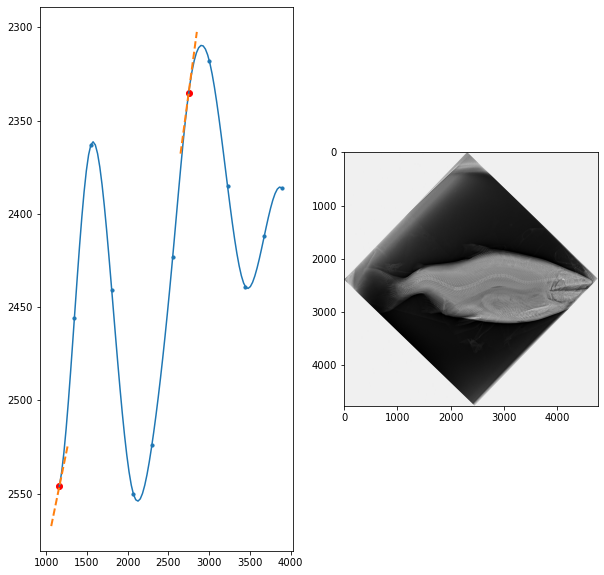

In [417]:
img= cv2.imread("json/22.jpg")
img_h,img_w = img.shape[:2]
mask = np.zeros((img_h,img_w,3),dtype = np.int32)
with open ("json/22.json","r") as f:
    data = json.load(f)
shapes = data["shapes"]
center_line = []
for i in range(0,len(shapes),5): 
    points = np.array(shapes[i]["points"],dtype = np.int32) 
    xc,yc = centroid(shapes[i]["points"])
    center_line.append((xc,yc))

center_line.sort(key = lambda x: x[0])
center_line_x =[]
center_line_y = []
for point in center_line:
    center_line_x.append(point[0])
    center_line_y.append(point[1])
cubic = CubicSpline(center_line_x,center_line_y)
pp  = cubic.derivative()
# h_ver = []
# for i in range(1,len(center_line_y)):
#     h_ver.append(center_line_y[i]-center_line_y[i-1])
# plt.bar(range(len(h_ver)),h_ver)

# poly = lagrange(center_line_x,center_line_y)
# coef = Polynomial(poly).coef
# print(coef)
# cubic = CubicSpline(center_line_x,center_line_y)
# print(cubic.derivative)

# spot_line = []
# for i in range(len(center_line)):

# for index in range(1,len(center_line)-2):
#     point1_x, point1_y = center_line[index-1]
#     point2_x, point2_y = center_line[index]
#     point3_x, point3_y = center_line[index+1]
#     point4_x, point4_y = center_line[index+2]

#     # line 12
#     k12 = -1*(point2_y-point1_y)/(point2_x-point1_x)

#     # line 23
#     k23 = -1*(point3_y - point2_y) / (point3_x - point2_x)
    
#     #line 34
#     k34 = -1*(point4_y - point3_y) / (point4_x - point3_x)
#     if k12 != k23 and k23 != k34:
#         y12 = (k12*point1_y - k23 * point2_y +point2_x - point1_x)/(k12-k23)
#         x12 =  point1_x + k12 * (y12 - point1_y)

#         y34 = (k23 * point2_y - k34 * point3_y + point3_x - point2_x)/(k23 - k34)
#         x34 = point2_x + k23* (y34 - point2_y)
        
#         vector1 = (x12 - point2_x,y12 - point2_y)
#         vector2 = (x34 - point2_x,y34 - point2_y)
        
#         cosAngle = (vector2[0]*vector1[0] + vector1[1]*vector2[1]) / math.sqrt((vector1[0]**2+vector1[1]**2)*(vector2[0]**2+vector2[1]**2)) 
#         if int(cosAngle) == -1:
#             cv2.circle(img,(point2_x,point2_y),2,(255,0,0),2)
#             spot_line.append((point3_x-point2_x , point3_y-point2_y))
# print(spot_line)
# angle_all = []
# for i in range(0,len(spot_line)-1):
#     vector1 = spot_line[i]
#     vector2 = spot_line[i+1]
#     cosAngle = (vector2[0]*vector1[0] + vector1[1]*vector2[1]) / math.sqrt((vector1[0]**2+vector1[1]**2)*(vector2[0]**2+vector2[1]**2))             
#     angle = 180/3.14 * math.acos(cosAngle)
#     angle_all.append(angle)
# print(max(angle_all))
#     cv2.circle(img,(xc,yc),2,(0,255,0),2)
    #cv2.fillPoly(mask,[points],color = (0,255,0))
# img= np.array(img,dtype=np.int32)
# result = cv2.addWeighted(img,0.8,mask,0.2,0)

x = np.linspace(center_line_x[0],center_line_x[-1],100)
len_coeff = len(coef)
y= []
for item in x:
    y_count = cubic(item)
#     y_count = 0
#     for i in range(len_coeff):
#         y_count += coef[len_coeff-1-i]*(item**i)
    y.append(y_count)

# find point 
slopes = []
for i in range(1,len(center_line_x)):
    if (center_line_x[i]-center_line_x[i-1]) != 0:
        slope = abs((center_line_y[i]-center_line_y[i-1])/(center_line_x[i] -center_line_x[i-1]))
    else:
        slope = 0
    slopes.append(slope)
# point max
index_max = np.argmax(np.array(slopes))
point_max_x = center_line_x[index_max]
point_max_y = center_line_y[index_max]

#point min
index_min = np.argmin(np.array(slopes))
point_min_x = center_line_x[index_min]
point_min_y = center_line_y[index_min]

# T_max = derivate_slope(point_max_x,coef)
# T_min = derivate_slope(point_min_x,coef)   
# T_max = (center_line_y[index_max]-center_line_y[index_max-1])/(center_line_x[index_max]-center_line_x[index_max-1])
# T_min = (center_line_y[index_min]-center_line_y[index_min-1])/(center_line_x[index_min]-center_line_x[index_min-1]) 
T_max = pp(point_max_x)
T_min = pp(point_min_x)
# vectormax = (-1*point_max_y/T_max + point_max_x,T_max*point_max_x + point_max_y)
# vectormin = (-1*point_min_y/T_min + point_min_x,T_min*point_min_x + point_min_y)
# angle = cos_vector(vectormax,vectormin)
# print(angle*180/3.14)

angle = 180/3.14 *abs(math.atan((T_max-T_min )/(1 + T_max*T_min)))
print(angle)


graph,(plot1,plot2) = plt.subplots(1,2,figsize=(10,10))


plot1.plot(x,y)
plot1.scatter(center_line_x,center_line_y,s=10)
plot1.scatter(point_max_x,point_max_y,color ="red")
plot1.scatter(point_min_x,point_min_y,color ="red")

xrangemax = np.linspace(point_max_x-100, point_max_x+100, 200)
yrangemax = []
for item in xrangemax:
    yrangemax.append(line_targent(item, point_max_x, point_max_y,T_max))
plot1.plot(xrangemax, yrangemax,'C1--', linewidth = 2)

xrangemin = np.linspace(point_min_x-100, point_min_x+100, 200)
yrangemin = []
for item in xrangemin:
    yrangemin.append(line_targent(item, point_min_x, point_min_y,T_min))
plot1.plot(xrangemin, yrangemin,'C1--', linewidth = 2)
# plot1.set_ylim([0,img.shape[0]])
# plot1.set_xlim([0,img.shape[1]])

plot1.invert_yaxis()
# plot1.text(200,100,"Cobb Angle: {}".format(str(int(angle))))
# plot1.text(200,150,"Ground Truth: LKS Severity 2")
plot2.imshow(img)

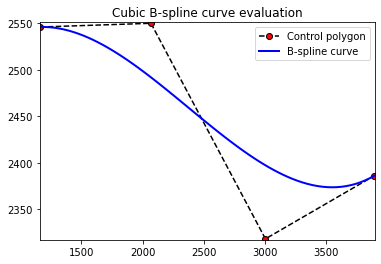

In [418]:
p= []
for i in range(0,len(center_line),4):
    p.append(center_line[i])
ctr =np.array(p)
x=ctr[:,0]
y=ctr[:,1]


l=len(x)  

t=np.linspace(0,1,l-2,endpoint=True)
t=np.append([0,0,0],t)
t=np.append(t,[1,1,1])

tck=[t,[x,y],3]
u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)
out = splev(u3,tck)

# find point 
slopes = []
for i in range(0,len(x)):
    slopes.append(pp(x[i]))
T_max = max(slopes)
T_min = min(slopes)

plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
#plt.plot(x,y,'ro',label='Control points only')
plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
plt.legend(loc='best')
plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
plt.title('Cubic B-spline curve evaluation')
# plt.ylim([0,img.shape[0]])
# plt.xlim([0,img.shape[1]])

# plt.invert_yaxis()
plt.show()

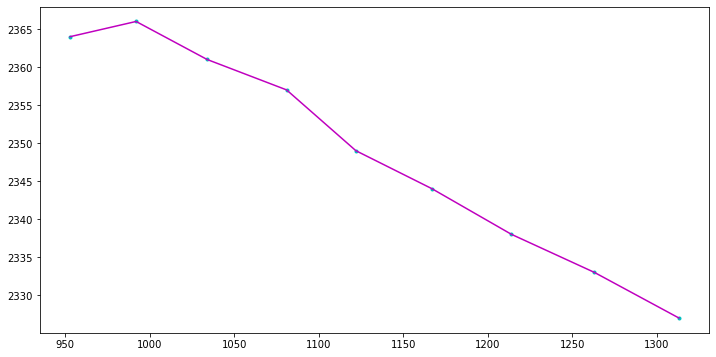

In [376]:
# Fit
ts =x
ys =y
n_interior_knots = 5
qs = np.linspace(0, 1, n_interior_knots+2)[1:-1]
knots = np.quantile(ts, qs)
tck = splrep(ts, ys, t=knots, k=3)
ys_smooth = splev(ts, tck)

# Alternative if one really wants to use BSpline: 
# ys_smooth = BSpline(*tck)(ts)

# Display
plt.figure(figsize=(12, 6))
plt.plot(ts, ys, '.c')
plt.plot(ts, ys_smooth, '-m')
plt.show()

In [31]:
# def find_coeff(arr_vers):
#     center_line_x = []
#     center_line_y = []
#     for shape in arr_vers: 
#         points = np.array(shape["points"],dtype = np.int32) 
#         xc,yc = centroid(shape["points"])
#         center_line_x.append(xc)
#         center_line_y.append(yc)
#     poly = lagrange(center_line_x,center_line_y)
#     coef = Polynomial(poly).coef
#     return coef
# def derivate_slope(x,coef):
#     slope = 0
#     for i in range(len(coef)):
#         slope += i * coef[len(coef)-i-1]*(x**(i-1))
#     return slope
# def line_targent(x,point_x,point_y,coef):
#     yrange = derivate_slope(point_x,coef)*(x-point_x)+point_y 
#     return yrange
def cos_vector(vector1,vector2):
    vector1 = np.array(list(vector1))
    vector2 = np.array(list(vector2))
    cosA = np.dot(vector1,vector2) / (np.linalg.norm(vector1)*np.linalg.norm(vector2))
    return np.arccos(cosA)
def line_targent(x,point_x,point_y,derivate):
    return derivate*(x-point_x) + point_y

5.5206909204824965


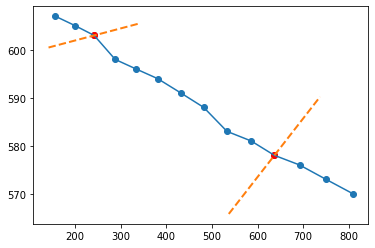

In [192]:
# x = []
# for item in center_line_x:
#     x.append(item)
# len_coeff = len(coef)
# y= []
# for item in x:
#     y_count = 0
#     for i in range(len_coeff):
#         y_count += coef[len_coeff-1-i]*(item**i)
#     y.append(y_count)

# find point 
slopes = []
for i in range(1,len(center_line_x)):
    if (center_line_x[i]-center_line_x[i-1]) != 0:
        slope = (center_line_y[i]-center_line_y[i-1])/(center_line_x[i] -center_line_x[i-1])
    else:
        slope = 0
    slopes.append(slope)
# point max
index_max = np.argmax(np.array(slopes))
point_max_x = center_line_x[index_max]
point_max_y = center_line_y[index_max]

#point min
index_min = np.argmin(np.array(slopes))
point_min_x = center_line_x[index_min]
point_min_y = center_line_y[index_min]

# T_max = derivate_slope(point_max_x,coef)
# T_min = derivate_slope(point_min_x,coef)   
# T_max = (center_line_y[index_max]-center_line_y[index_max-1])/(center_line_x[index_max]-center_line_x[index_max-1])
# T_min = (center_line_y[index_min]-center_line_y[index_min-1])/(center_line_x[index_min]-center_line_x[index_min-1]) 
T_max = knog(point_max_x)
T_min = knog.derivative(point_min_x)
# vectormax = (-1*point_max_y/T_max + point_max_x,T_max*point_max_x + point_max_y)
# vectormin = (-1*point_min_y/T_min + point_min_x,T_min*point_min_x + point_min_y)
# angle = cos_vector(vectormax,vectormin)
# print(angle*180/3.14)

angle = 180/3.14 *abs(math.atan((T_max-T_min )/(1 + T_max*T_min)))
print(angle)


plt.plot(center_line_x,center_line_y)
plt.scatter(center_line_x,center_line_y)
plt.scatter(point_max_x,point_max_y,color ="red")
plt.scatter(point_min_x,point_min_y,color ="red")

xrangemax = np.linspace(point_max_x-100, point_max_x+100, 200)
yrangemax = []
for item in xrangemax:
    yrangemax.append(line_targent(item, point_max_x, point_max_y,T_max))
plt.plot(xrangemax, yrangemax,'C1--', linewidth = 2)

xrangemin = np.linspace(point_min_x-100, point_min_x+100, 200)
yrangemin = []
for item in xrangemin:
    yrangemin.append(line_targent(item, point_min_x, point_min_y,T_min))
plt.plot(xrangemin, yrangemin,'C1--', linewidth = 2)

[626, 625, 626, 620, 621, 620, 618, 619, 623, 624, 629, 635, 644, 652, 662, 674]


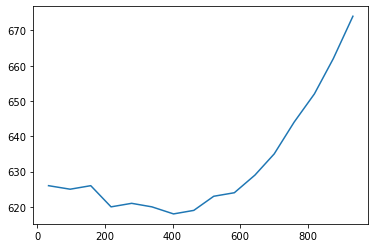

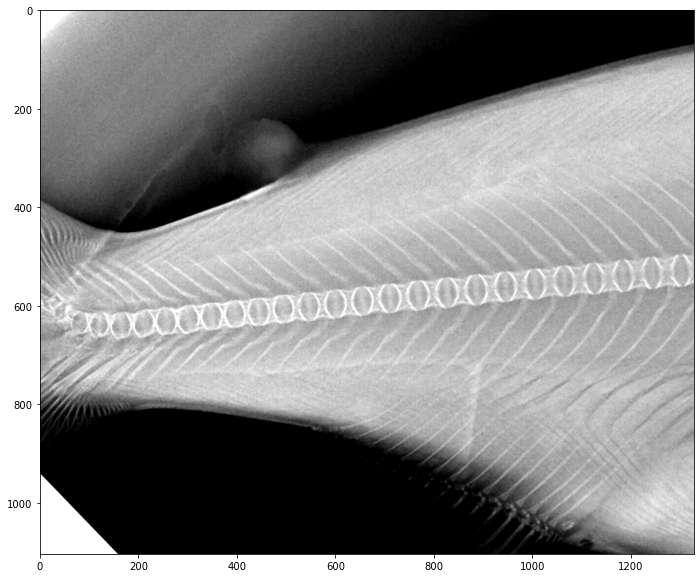

In [18]:

img= cv2.imread("6.jpg")
augment = ia.LinearContrast(2)
img_aug = augment.augment_image(img)
# mask_aug = augment.augment_image(mask)
# result_2 = cv2.addWeighted(img_aug,0.8,mask,0.2,0)

plt.figure(figsize = (20,10))
plt.imshow(img_aug)

In [24]:
mask_aug = np.array(mask_aug,dtype = np.int32)
mask_aug_gray = cv2.cvtColor(mask_aug,cv2.COLOR_BGR2GRAY)
print(set(mask_aug_gray.flatten()))

error: OpenCV(4.5.5) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xa96199bf::Set<1,-1,-1>,struct cv::impl::A0xa96199bf::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


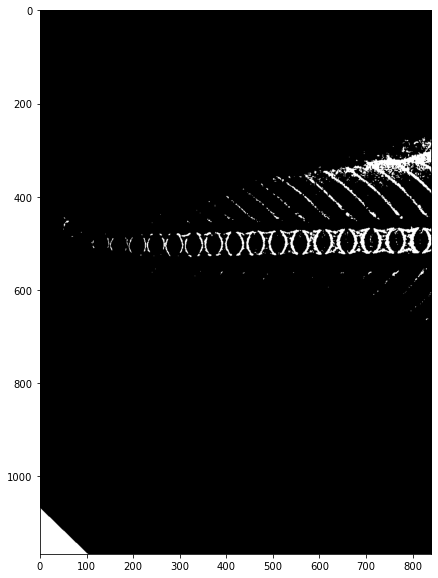

In [11]:
img_spine = cv2.imread("16_1.jpg")
img_spine_gray = cv2.cvtColor(img_spine,cv2.COLOR_BGR2GRAY)
_,img_binary = cv2.threshold(img_spine,145,255,cv2.THRESH_BINARY)
plt.figure(figsize = (20,10))
plt.imshow(img_binary,cmap ="gray")